In [1]:
# Create a datasource and load trades
from logging_helper import *
from marketdata.polygon import *
from util import chunks

LOG = logging.getLogger("JUP")
init_logging()

ds = PolygonDataSource(cache_dir="C:/dev/git/findmyfills-api/tests/test_data")


2019-07-11 14:11:04,345 [MainThread  ] [INFO ]  load_caches: C:/dev/git/findmyfills-api/tests/test_data
2019-07-11 14:11:04,347 [MainThread  ] [INFO ]  load_trade_conditions: 55 items  (cache_file)
2019-07-11 14:11:04,348 [MainThread  ] [INFO ]  load_quote_conditions: 45 items  (cache_file)
2019-07-11 14:11:04,349 [MainThread  ] [INFO ]  load_exchanges: 26 items  (cache_file)


In [2]:
# Get dates of NBBO
dates = list(filter(lambda x: x.startswith("2019"), ds.get_nbbo_dates(convert=False)))
LOG.info("=" * 70)
LOG.info("NBBO=%d", len(dates))
for chunk in chunks(dates, 5):
    LOG.info(chunk)


2019-07-11 14:11:07,753 [MainThread  ] [INFO ]  ======================================================================
2019-07-11 14:11:07,754 [MainThread  ] [INFO ]  NBBO=131
2019-07-11 14:11:07,755 [MainThread  ] [INFO ]  ['2019-07-10', '2019-07-09', '2019-07-08', '2019-07-05', '2019-07-03']
2019-07-11 14:11:07,756 [MainThread  ] [INFO ]  ['2019-07-02', '2019-07-01', '2019-06-28', '2019-06-27', '2019-06-26']
2019-07-11 14:11:07,757 [MainThread  ] [INFO ]  ['2019-06-25', '2019-06-24', '2019-06-21', '2019-06-20', '2019-06-19']
2019-07-11 14:11:07,758 [MainThread  ] [INFO ]  ['2019-06-18', '2019-06-17', '2019-06-14', '2019-06-13', '2019-06-12']
2019-07-11 14:11:07,759 [MainThread  ] [INFO ]  ['2019-06-11', '2019-06-10', '2019-06-07', '2019-06-06', '2019-06-05']
2019-07-11 14:11:07,759 [MainThread  ] [INFO ]  ['2019-06-04', '2019-06-03', '2019-05-31', '2019-05-30', '2019-05-29']
2019-07-11 14:11:07,760 [MainThread  ] [INFO ]  ['2019-05-28', '2019-05-24', '2019-05-23', '2019-05-22', '2019

In [3]:
sym = 'IBKR'
date = '2019-07-05 09:45:00'
dt_start = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
dt_end = dt_start + datetime.timedelta(minutes=60)
LOG.info("date=%s", date)

limit = 10000
nbbos = ds.get_nbbo(sym, dt_start, dt_end, limit * 4, True)
all_trades = ds.get_trades_v2(sym, dt_start, dt_end, limit, True)
trades = list(filter(lambda x:'p' in x['flags'], all_trades))
LOG.info("nbbos=%d, trades=%d, lse_trades=%d" %(len(nbbos), len(all_trades), len(trades) ))
df_nbbos = pd.DataFrame(nbbos)
df_trades = pd.DataFrame(trades)
ms_to_datetime64(df_nbbos, 'sip_timestamp')
ms_to_datetime64(df_trades, 'sip_timestamp')


2019-07-11 14:11:20,835 [MainThread  ] [INFO ]  date=2019-07-05 09:45:00
2019-07-11 14:11:20,837 [MainThread  ] [INFO ]  get_nbbo(IBKR,2019-07-05 09:45:00 to 2019-07-05 10:45:00,40000)
2019-07-11 14:11:28,987 [MainThread  ] [INFO ]  get_trades_v2(IBKR,2019-07-05 09:45:00-2019-07-05 10:45:00,10000)
2019-07-11 14:11:29,724 [MainThread  ] [INFO ]  nbbos=1132, trades=790, lse_trades=130


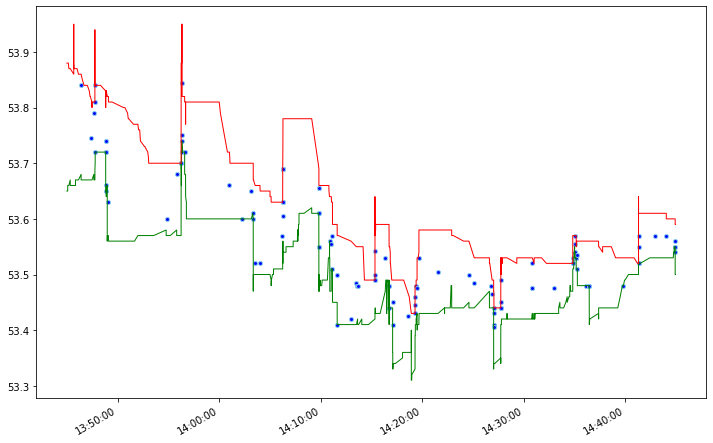

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot('sip_timestamp', 'price', data=df_trades, 
         marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=0)
plt.plot('sip_timestamp', 'bid_price', data=df_nbbos,
         marker='o', markerfacecolor='green', markersize=0, color='green', linewidth=1)
plt.plot('sip_timestamp', 'ask_price', data=df_nbbos,
         marker='o', markerfacecolor='red', markersize=0, color='red', linewidth=1)

plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 8)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()


In [6]:
%%time
trade_summary = ds.calc_venue_summary(all_trades)
LOG.info("\n%s", trade_summary)


2019-07-11 14:12:03,663 [MainThread  ] [INFO ]  calc_venue_summary: 790 trades -> 14 rows, duration=0:00:00.100109
2019-07-11 14:12:03,664 [MainThread  ] [INFO ]  
   exchange    n  n_lse  n_blocks  n_oddlot  v_total  v_lse  v_blocks  \
0      ARCX   24      8         0        16     1688    847         0   
1      BATS   25      8         0        17     1810    800         0   
2      BATY   85     18         0        67     3829   1800         0   
3      EDGA   26      7         0        19     1700    726         0   
4      EDGX   32      1         0        31     1542    100         0   
5      FINR  140      9         0       128     8295   1300         0   
6      IEXG  200     27         0       171    15552   3000         0   
7      PHLX    1      0         0         1      100      0         0   
8      XASE    2      0         0         2      100      0         0   
9      XBOS   24      4         0        20     1502    400         0   
10     XCIS   10      1         0